# 0.0 Imports

In [1]:
import math
import inflection
import warnings

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from IPython.core.display  import HTML
from IPython.display       import Image


## 0.1. Helper Functions

In [2]:
def num_metrics(num_attributes):
    #Central tendencian - mean, median
    ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    #Dispersion - std, min, max, range, skew, kurtosis

    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

    #Concatenate
    metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    metrics.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew','kurtosis']
    return metrics


def rename_columns( cols_update, data):

    snakecase = lambda x: inflection.underscore(x)

    cols_new = list(map(snakecase, cols_old))

    #Rename of columns
    data.columns = cols_new
    
    return data.sample()

def jupyter_settings():
    
    %matplotlib inline 
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize']=[20,10]
    plt.rcParams['font.size']=10
    
    display( HTML('<style>.container {width:80% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr',False )
    
    sns.set()

In [3]:
jupyter_settings()
warnings.filterwarnings ('ignore')

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [4]:
#Loading datasets
df_raw = pd.read_csv('../data/healthcare-dataset-stroke-data.csv', low_memory=False)

In [5]:
df_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1.0 Data Description

## 1.1. Rename Columns

In [6]:
df1 = df_raw.copy()

In [7]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
cols_old = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
            'smoking_status', 'stroke'] 

rename_columns(cols_old,df1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
879,4808,Female,71.0,0,0,Yes,Self-employed,Urban,91.35,NaN,formerly smoked,0


## 1.2. Data Dimension

In [9]:
print('Number rows: {}'.format(df1.shape[0]))
print('Number cols: {}'.format(df1.shape[1]))

Number rows: 5110
Number cols: 12


## 1.3. Data Types

In [10]:
df1.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## 1.4. Check NA

In [11]:
df1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 1.5. Fillout NA

Observações:

- Indice de massa corporal como eles tem valores nulos pode ser que não foi feito o cálculo nestes pacientes.
- Como o dataset não é muito grande excluir não seria ideal.
- Pode trocar pela média dos valores acho que é uma estratégia.

In [12]:
np.round(df1['bmi'].mean(),2)

28.89

In [13]:
df1['bmi'] = df1['bmi'].apply(lambda x: 28.89 if math.isnan(x) else x)

In [14]:
df1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 1.6. Change

## 1.7. Descriptive Statistical

In [15]:
#Separate categorical variables from numeric variables

num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes=df1.select_dtypes(include = ['object'])

### 1.7.1 Numerical Attributes

In [16]:
num_metrics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,67.00,72940.00,72873.00,36517.829354,36932.000,21159.650905,-0.019913,-1.212368
1,age,0.08,82.00,81.92,43.226614,45.000,22.610434,-0.137059,-0.991010
2,hypertension,0.00,1.00,1.00,0.097456,0.000,0.296578,2.715392,5.375456
3,heart_disease,0.00,1.00,1.00,0.054012,0.000,0.226041,3.947244,13.586052
4,avg_glucose_level,55.12,271.74,216.62,106.147677,91.885,45.279129,1.572284,1.680479
5,bmi,10.30,97.60,87.30,28.893110,28.400,7.697265,1.076766,3.623133
6,stroke,0.00,1.00,1.00,0.048728,0.000,0.215299,4.193284,15.589736


### 1.7.2 Categorical Attributes

In [17]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

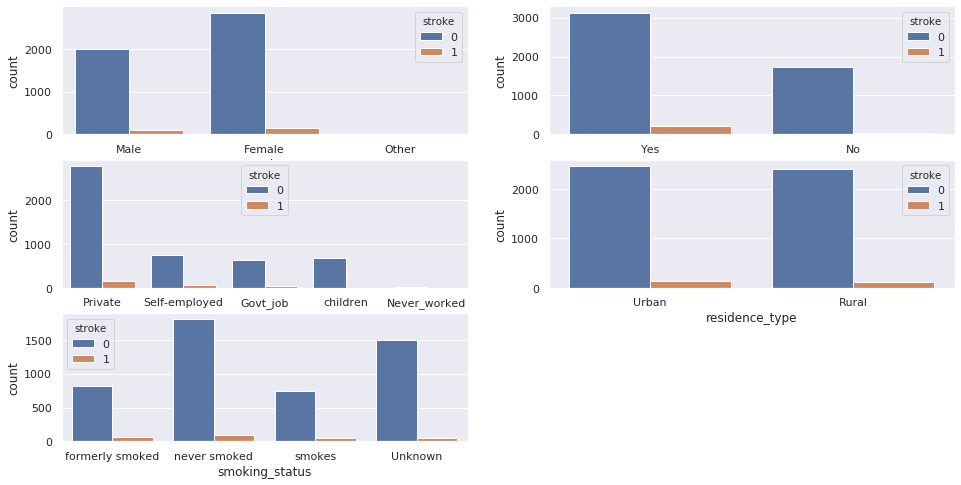

In [18]:
plt.figure(figsize=(16,8))


#Gender
plt.subplot(3, 2, 1)
sns.countplot(data=df1,x='gender',hue='stroke');

# Ever Married
plt.subplot(3, 2, 2)
sns.countplot( data=df1,x='ever_married',hue='stroke');

# Work Type
plt.subplot(3, 2, 3)
sns.countplot(data=df1,x='work_type',hue='stroke');

#Residence Type
plt.subplot(3, 2, 4)
sns.countplot( data=df1,x='residence_type',hue='stroke');

# Smoking Status
plt.subplot(3, 2, 5)
sns.countplot(data=df1,x='smoking_status',hue='stroke');

# 2.0 Feature Engineering

In [19]:
df2 = df1.copy()

## 2.1 Hypothesis Map

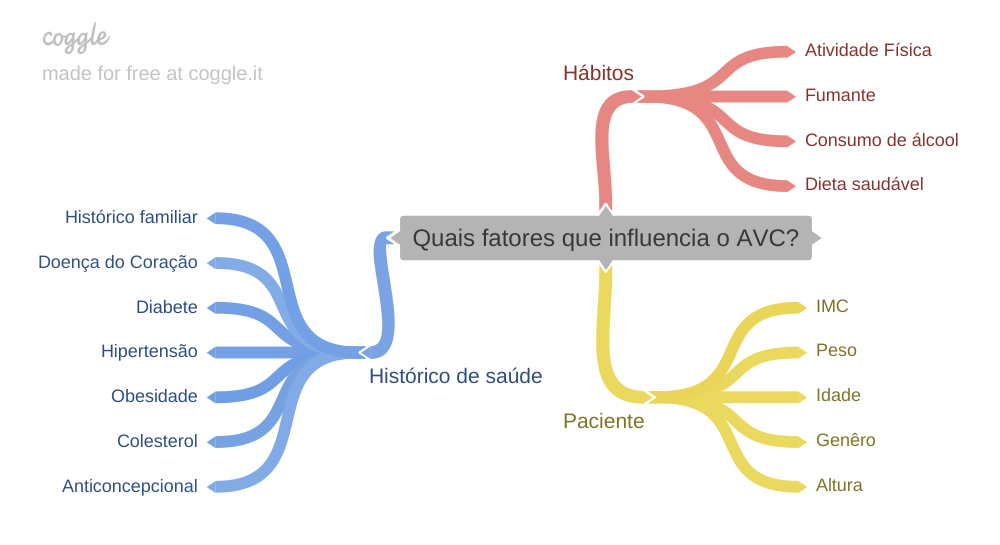

In [20]:
Image('../img/hypotesis.png')

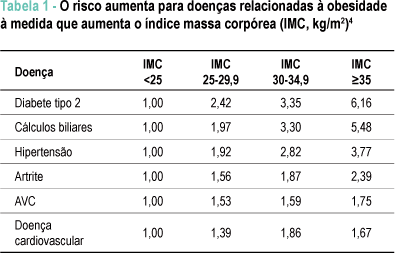

In [21]:
Image('../img/imc.png')

## 2.2 Business Hypothesis List

### Pacientes

1. Pacientes do sexo masculino tem maiores chance de sofrer AVC do que pacientes do sexo feminino.
2. Pacientes com Idade acima de 40 anos tem maiores chances de sofrer AVC do que pacientes com idade menor.
3. Pacientes com peso acima de 80 quilos tem maiores chances de sofrer AVC do que pacientes com peso menor.
4. Pacientes com IMC acima de 30  tem maiores chances de sofrer um AVC do que pessoas com IMC menor que 30.
5. Pacientes mulheres acima dos 45 anos tem maiores chances de sofrer AVC do que mulheres com menos.
6. Pacientes homens acima de 40 anos tem maiores chances de sofrer AVC do que homens com menos de 40 anos.

### Hábitos

1. Pacientes fumantes tem maiores chances de sofre AVC do que pacientes que não fumam.
2. Pacientes que tem consumo de álcool frequente tem maiores chances de sofrer um AVC que não consomem álcool.
3. Pacientes que são sedentarios tem maiores chances de sofrer AVC do que pacientes que tem atividade física.


### Histórico de saúde

1. Pacientes com histórico de doenças cardiácas na familia tendem a ter maiores chances de sofrer AVC do que pacientes que não tem este hitórico.
2. Pacientes mulheres que fazem uso de anticoncepcional tem maiores chances de ter AVC do que mulheres que não realizam o uso.
3. Pacientes com hipertensão tem maiores chances de sofrer um AVC do que pacientes que não tem hipertensão.

## 2.3 Final Hypothesis 

### Pacientes

1. Pacientes do sexo masculino tem maiores chance de sofrer AVC do que pacientes do sexo feminino.
2. Pacientes com Idade acima de 40 anos tem maiores chances de sofrer AVC do que pacientes com idade menor que 40 anos.
3. Pacientes com peso acima de 80 quilos tem maiores chances de sofrer AVC do que pacientes com peso menor que 80 quilos
4. Pacientes com IMC acima de 30  tem maiores chances de sofrer um AVC do que pessoas com IMC menor que 30.
5. Pacientes mulheres acima dos 45 anos tem maiores chances de sofrer AVC do que mulheres com menos de 45 anos.
6. Pacientes homens acima de 40 anos tem maiores chances de sofrer AVC do que homens com menos de 40 anos.

### Hábitos

1. Pacientes fumantes tem maiores chances de sofre AVC do que pacientes que não fumam.
2. Pacientes que tem consumo de álcool frequente tem maiores chances de sofrer um AVC que não consomem álcool.
3. Pacientes que são sedentarios tem maiores chances de sofrer AVC do que pacientes que tem atividade física.


### Histórico de saúde

1. Pacientes com histórico de doenças cardiácas na familia tendem a ter maiores chances de sofrer AVC do que pacientes que não tem este hitórico.
2. Pacientes mulheres que fazem uso de anticoncepcional tem maiores chances de ter AVC do que mulheres que não realizam o uso.
3. Pacientes com hipertensão tem maiores chances de sofrer um AVC do que pacientes que não tem hipertensão.

## 2.4 Feature Engineering

In [22]:
df2.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3392,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0


In [23]:
#gender
df2['gender_binary']= df2['gender'].apply(lambda x: 0  if x == 'Female' else 1)

#gender
df2['residence_type']= df2['residence_type'].apply(lambda x: 0  if x == 'Urban' else 1)

# 3.0 Variable Filtering

In [24]:
df3 = df2.copy()

## 3.1 Rows Filtering

In [25]:
# Neste primeiro momento não vou tirar linhas

## 3.2 Selection Columns

In [26]:
# Vou usar todas as colunas 

# 4.0 Exploratory Analysis

In [27]:
#Separate categorical variables from numeric variables
num_attributes = df3.select_dtypes(include = ['int64', 'float64'])
cat_attributes=df3.select_dtypes(include = ['object'])

## 4.1 Analysis Univariate

### 4.1.1 Response Variable

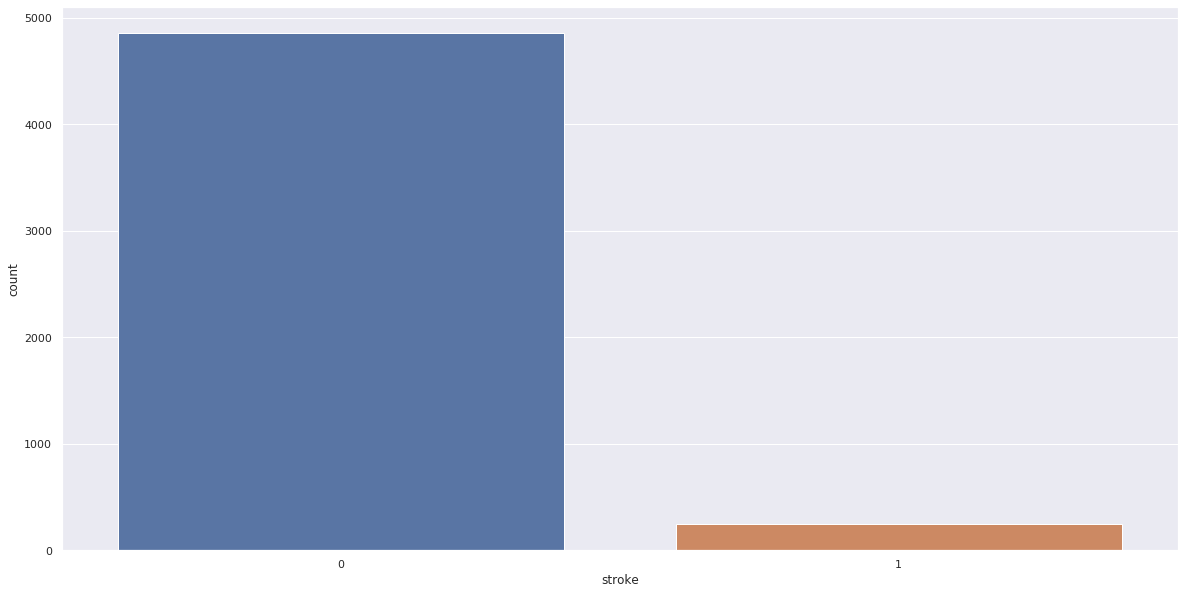

In [28]:
sns.countplot(x='stroke', data= df3);

Observações:
    - Variável target está bem desbalanceada, com isso pode prejudicar o aprendizado do algoritmo usado.

### 4.1.2 Numerical Variable

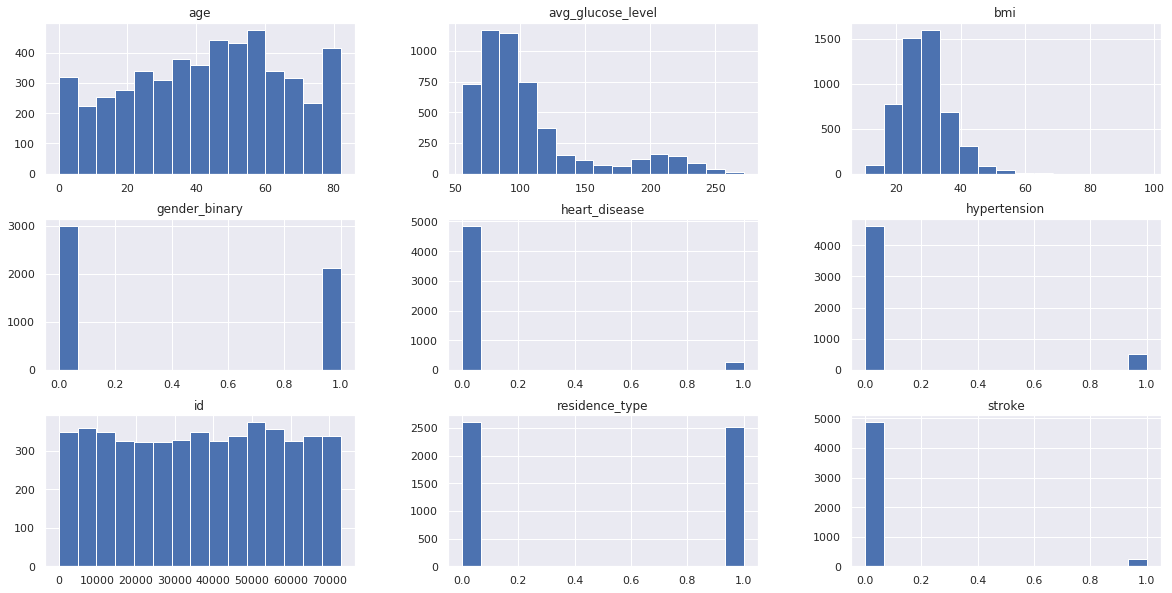

In [29]:
num_attributes.hist(bins=15);

Observações:
    - Variáveis heart_disease e hypertension variáveis apresenta um desbalanceamento

### 4.1.3 Categorical Variable

In [31]:
cat_attributes.columns

Index(['gender', 'ever_married', 'work_type', 'smoking_status'], dtype='object')

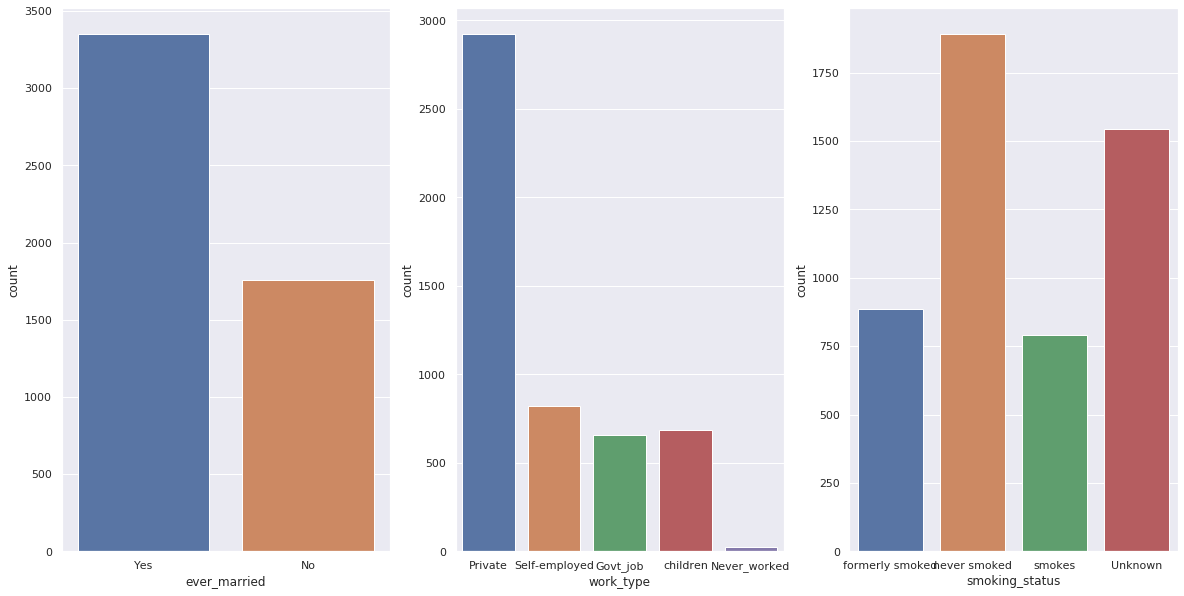

In [32]:
plt.subplot(1,3,1)
sns.countplot(x='ever_married', data= cat_attributes);

plt.subplot(1, 3, 2)
sns.countplot(x='work_type', data= cat_attributes);


plt.subplot(1, 3, 3)
sns.countplot(x='smoking_status', data= cat_attributes);



## 4.2 Analysis Bivariate

### 1. Pacientes do sexo masculino tem maiores chance de sofrer AVC do que pacientes do sexo feminino.

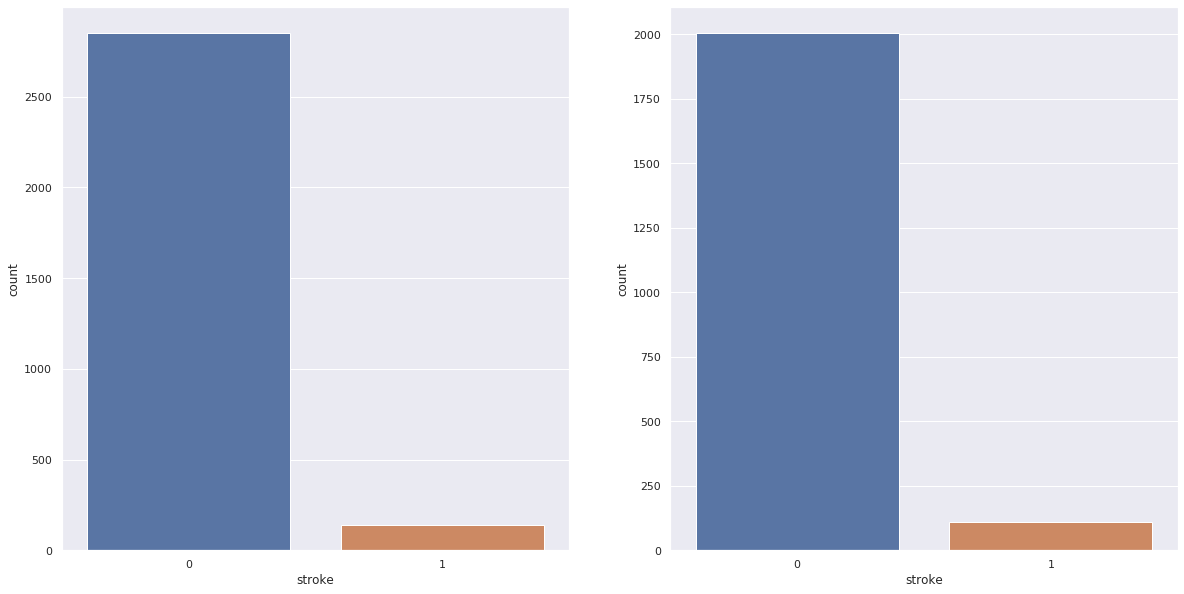

In [67]:
aux = df3[['gender','stroke']]

plt.subplot(1,2,1)
aux1 = aux[aux['gender'] == 'Female']
sns.countplot(x='stroke', data= aux1);


plt.subplot(1,2,2)
aux2 = aux[aux['gender'] == 'Male']
sns.countplot(x='stroke', data= aux2);

In [71]:
aux1['stroke'].value_counts()

0    2853
1     141
Name: stroke, dtype: int64

In [72]:
aux2['stroke'].value_counts()

0    2007
1     108
Name: stroke, dtype: int64

In [90]:
df3.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
gender_binary          int64
dtype: object

In [92]:
df3['age'] = df3['age'].astype(int)

### 2. Pacientes com Idade acima de 40 anos tem maiores chances de sofrer AVC do que pacientes com idade menor que 40 anos.

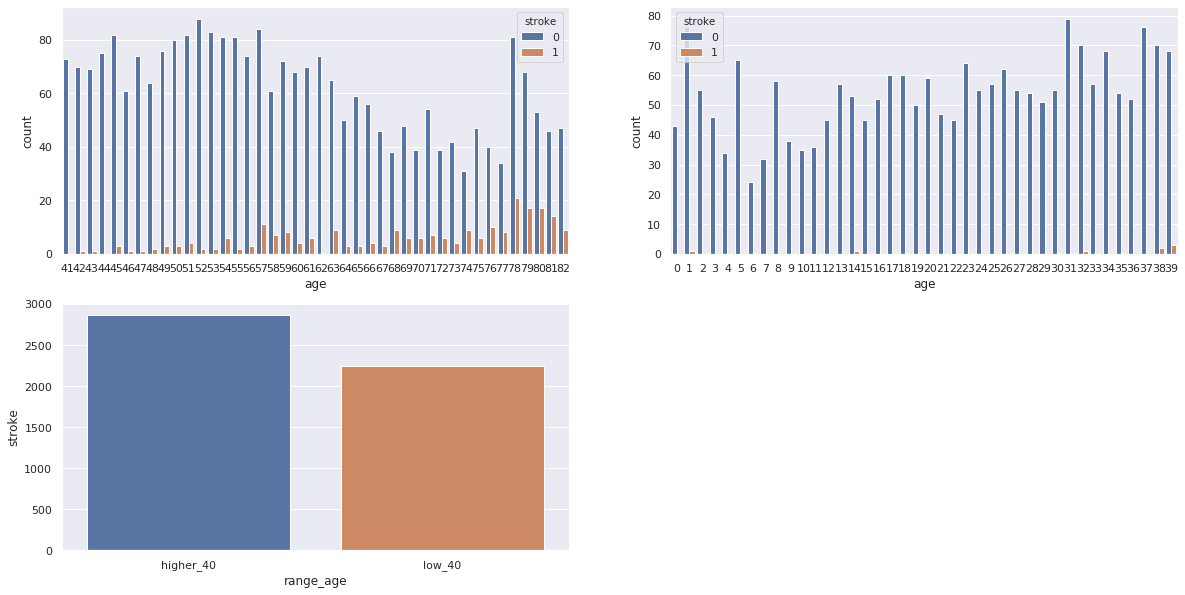

In [98]:
aux = df3[['age','stroke']]
aux['range_age'] = aux['age'].apply(lambda x: 'low_40' if x <= 40 else 'higher_40')
aux1 = aux[['range_age', 'stroke']].groupby('range_age').count().reset_index()

plt.subplot(2,2,1)
aux2 = aux[aux['age'] > 40]
sns.countplot(x='age', hue='stroke', data=aux2)

plt.subplot(2,2,2)
aux2 = aux[aux['age'] < 40]
sns.countplot(x='age', hue='stroke', data=aux2)

plt.subplot(2,2,3)
sns.barplot(x='range_age',y='stroke', data= aux1);

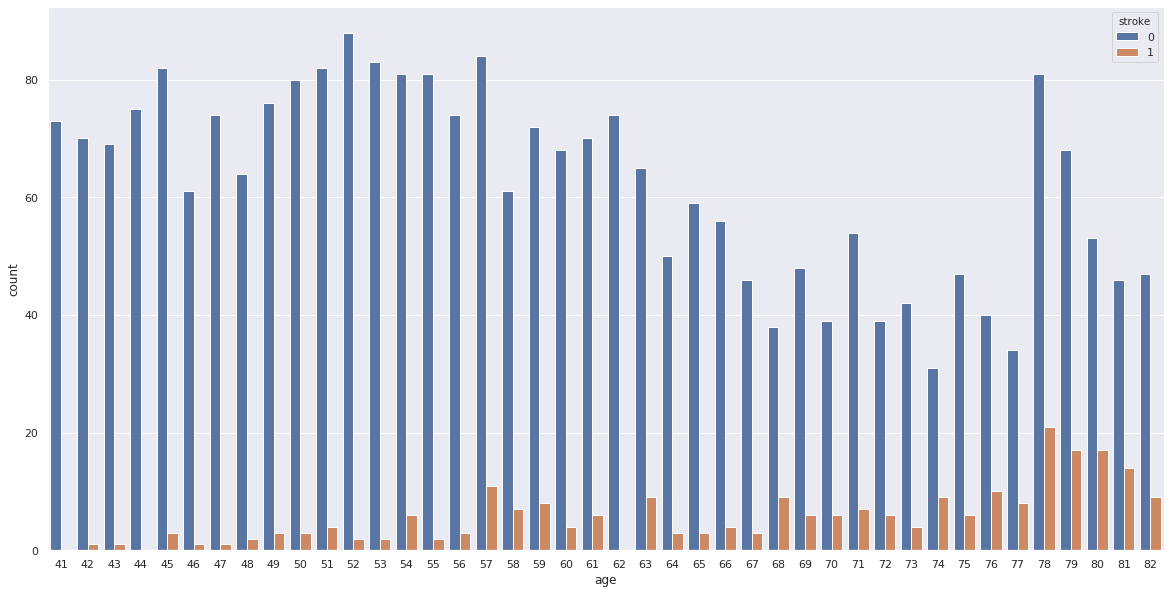

In [100]:
aux2 = aux[aux['age'] > 40]
sns.countplot(x='age', hue='stroke', data=aux2);

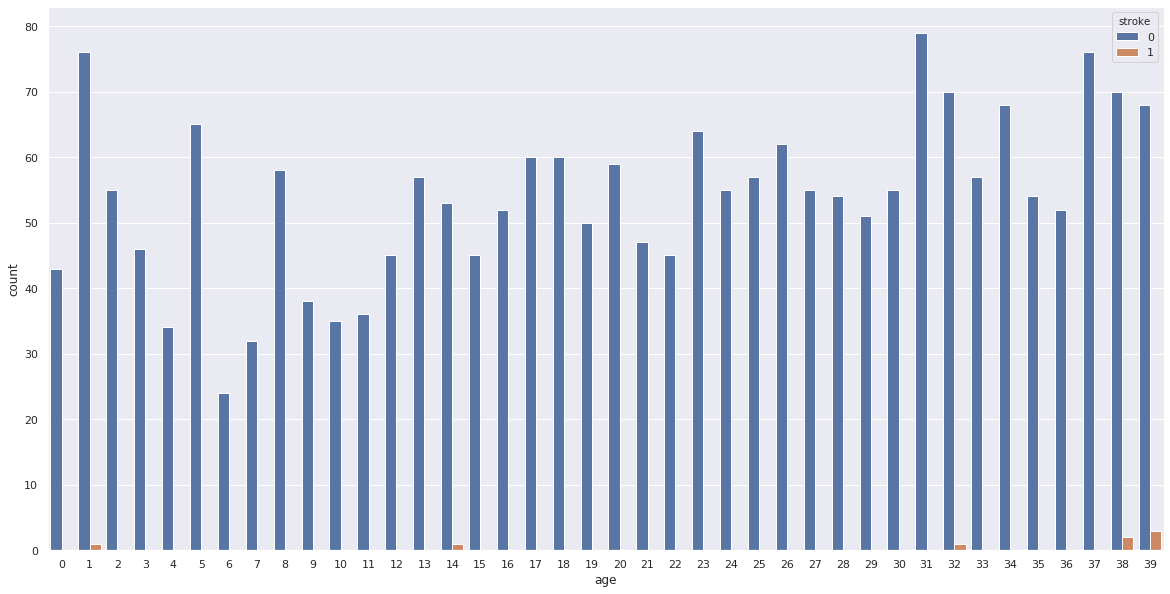

In [102]:
aux2 = aux[aux['age'] < 40]
sns.countplot(x='age', hue='stroke', data=aux2);

## 4.3 Analysis Multivariate